In [1]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
filename = "2008.csv"
n = sum(1 for line in open('2008.csv')) - 1 #number of records in file (excludes header)
s = 10000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df = pd.read_csv(filename, skiprows=skip)

In [3]:
df.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,646.0,645,752.0,755,WN,2189,...,13.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,2039.0,1930,155.0,55,WN,3940,...,5.0,14.0,0,NaN,0,0.0,0.0,22.0,0.0,38.0
2,2008,1,3,4,624.0,625,729.0,740,WN,2538,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,621.0,615,948.0,945,WN,482,...,8.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,2239.0,2115,2358.0,2240,WN,3491,...,2.0,10.0,0,NaN,0,7.0,0.0,0.0,0.0,71.0


In [4]:
df.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime               187
CRSDepTime              0
ArrTime               208
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum               123
ActualElapsedTime     211
CRSElapsedTime          1
AirTime               211
ArrDelay              211
DepDelay              187
Origin                  0
Dest                    0
Distance                0
TaxiIn                208
TaxiOut               187
Cancelled               0
CancellationCode     9812
Diverted                0
CarrierDelay         7868
WeatherDelay         7868
NASDelay             7868
SecurityDelay        7868
LateAircraftDelay    7868
dtype: int64

In [5]:
df = df[np.isfinite(df['ArrDelay'])]

In [6]:
df.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime                 0
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum                 0
ActualElapsedTime       0
CRSElapsedTime          0
AirTime                 0
ArrDelay                0
DepDelay                0
Origin                  0
Dest                    0
Distance                0
TaxiIn                  0
TaxiOut                 0
Cancelled               0
CancellationCode     9789
Diverted                0
CarrierDelay         7657
WeatherDelay         7657
NASDelay             7657
SecurityDelay        7657
LateAircraftDelay    7657
dtype: int64

In [7]:
# drop NaN values in data
df.drop(['CancellationCode', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
        'SecurityDelay', 'LateAircraftDelay', 'Cancelled', 'Diverted', 'Year', 'TailNum'], axis=1, inplace=True)

In [8]:
df.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
dtype: int64

In [9]:
df.dtypes

Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
dtype: object

In [10]:
df.sample(5)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut
3242,4,6,7,554.0,600,915.0,935,NW,676,141.0,155.0,120.0,-20.0,-6.0,SLC,MSP,991,6.0,15.0
9614,12,15,1,1656.0,1700,1913.0,1859,DL,1975,137.0,119.0,88.0,14.0,-4.0,DCA,ATL,547,27.0,22.0
6015,7,18,5,954.0,958,1123.0,1127,AS,151,89.0,89.0,78.0,-4.0,-4.0,OME,ANC,539,6.0,5.0
2544,3,30,7,741.0,740,1039.0,1035,AS,728,178.0,175.0,154.0,4.0,1.0,SEA,TUS,1216,3.0,21.0
3275,4,3,4,1435.0,1435,1605.0,1608,OH,5628,90.0,93.0,69.0,-3.0,0.0,MCO,GSP,449,3.0,18.0


In [11]:
df.loc[0:300, 'FlightNum':"TaxiIn"].head(5)

,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn
0,2189,66.0,70.0,46.0,-3.0,1.0,JAX,FLL,318,13.0
1,3940,196.0,205.0,177.0,60.0,69.0,LAS,BNA,1588,5.0
2,2538,65.0,75.0,52.0,-11.0,-1.0,LAS,RNO,345,4.0
3,482,147.0,150.0,128.0,3.0,6.0,MDW,MCO,989,8.0
4,3491,79.0,85.0,67.0,78.0,84.0,MDW,OMA,423,2.0


In [12]:
df.shape

(9789, 19)

In [13]:
# create another column, 'late' that represents an arrival time more than 30 minutes late.
df['late'] = df['ArrDelay'].apply(lambda x: 1 if x > 30 else 0)

In [14]:
df.sample(10)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,late
6110,7,8,2,1740.0,1750,2026.0,2026,DL,1148,106.0,96.0,74.0,0.0,-10.0,PHX,SLC,507,5.0,27.0,0
4922,6,8,7,1135.0,1045,1410.0,1300,MQ,3935,155.0,135.0,108.0,70.0,50.0,ORD,MOB,779,3.0,44.0,1
1036,2,8,5,1154.0,1155,1401.0,1405,XE,560,127.0,130.0,103.0,-4.0,-1.0,MSY,MCI,690,4.0,20.0,0
3817,5,11,7,1212.0,1125,1327.0,1249,UA,69,135.0,144.0,116.0,38.0,47.0,DEN,LAX,862,4.0,15.0,1
924,2,9,6,1710.0,1700,1747.0,1735,WN,101,97.0,95.0,75.0,12.0,10.0,CLE,BNA,448,14.0,8.0,0
231,1,1,2,1131.0,1140,1318.0,1330,OO,3860,107.0,110.0,82.0,-12.0,-9.0,SLC,YUM,580,5.0,20.0,0
6106,7,7,1,1736.0,1700,2005.0,1934,DL,1189,269.0,274.0,249.0,31.0,36.0,MCO,SLC,1929,10.0,10.0,1
2280,3,22,6,1905.0,1910,2118.0,2130,FL,410,133.0,140.0,116.0,-12.0,-5.0,MCO,IND,828,8.0,9.0,0
7934,10,20,1,1559.0,1603,1708.0,1711,OO,5770,69.0,68.0,52.0,-3.0,-4.0,PDX,MFR,222,4.0,13.0,0
9415,12,16,2,645.0,605,733.0,639,YV,1034,48.0,34.0,19.0,54.0,40.0,LIH,HNL,102,7.0,22.0,1


In [15]:
df.sum(axis=0)

Month                                                            61987
DayofMonth                                                      152978
DayOfWeek                                                        38105
DepTime                                                    1.30097e+07
CRSDepTime                                                    12932060
ArrTime                                                    1.44498e+07
CRSArrTime                                                    14587048
UniqueCarrier        WNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWNWN...
FlightNum                                                     21080160
ActualElapsedTime                                           1.2495e+06
CRSElapsedTime                                             1.26613e+06
AirTime                                                    1.02164e+06
ArrDelay                                                         77715
DepDelay                                                         94343
Origin

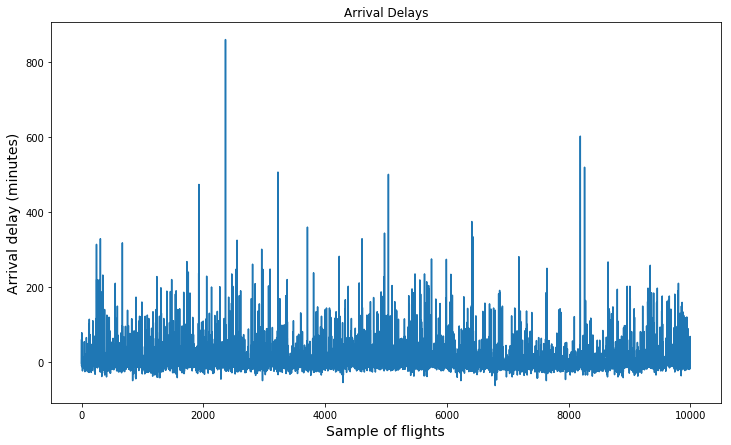

In [16]:
df['ArrDelay'].plot(figsize=(12,7))
plt.title('Arrival Delays')
plt.xlabel('Sample of flights', fontsize=14)
plt.ylabel('Arrival delay (minutes)', fontsize=14)
plt.show()

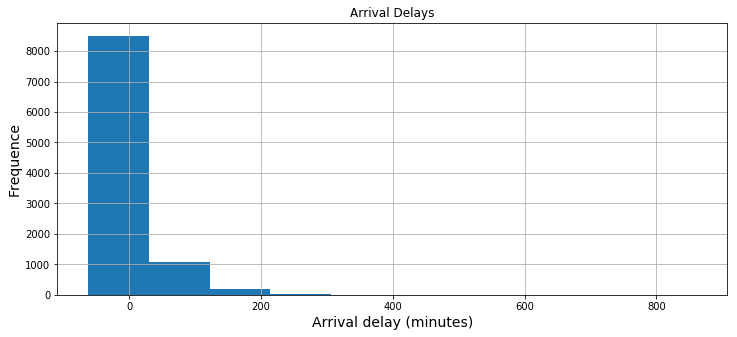

In [17]:
# plot all of the data by unit sales

df.hist(column='ArrDelay', figsize=(12,5))
plt.title('Arrival Delays')
plt.xlabel('Arrival delay (minutes)', fontsize=14)
plt.ylabel('Frequence', fontsize=14)
plt.show()

In [18]:
# sns.set(font_scale=1.0)
# plt.figure(figsize=(12, 7))
# sns.heatmap(df.corr())

In [19]:
# sns.set(font_scale=2.0)
# sns.pairplot(df)

In [20]:
df = pd.get_dummies(df, columns=['UniqueCarrier', 'Origin', 'Dest'])

In [21]:
# drop categorical column which have been accounted for
df.head(5)

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Dest_TUS,Dest_TVC,Dest_TWF,Dest_TXK,Dest_TYS,Dest_VPS,Dest_WRG,Dest_XNA,Dest_YAK,Dest_YUM
0,1,3,4,646.0,645,752.0,755,2189,66.0,70.0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4,2039.0,1930,155.0,55,3940,196.0,205.0,...,0,0,0,0,0,0,0,0,0,0
2,1,3,4,624.0,625,729.0,740,2538,65.0,75.0,...,0,0,0,0,0,0,0,0,0,0
3,1,3,4,621.0,615,948.0,945,482,147.0,150.0,...,0,0,0,0,0,0,0,0,0,0
4,1,3,4,2239.0,2115,2358.0,2240,3491,79.0,85.0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df.shape

(9789, 560)

In [23]:
df['ArrDelay'].head()

0    -3.0
1    60.0
2   -11.0
3     3.0
4    78.0
Name: ArrDelay, dtype: float64

In [24]:
df.dtypes

Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
FlightNum              int64
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Distance               int64
TaxiIn               float64
TaxiOut              float64
late                   int64
UniqueCarrier_9E       uint8
UniqueCarrier_AA       uint8
UniqueCarrier_AQ       uint8
UniqueCarrier_AS       uint8
UniqueCarrier_B6       uint8
UniqueCarrier_CO       uint8
UniqueCarrier_DL       uint8
UniqueCarrier_EV       uint8
UniqueCarrier_F9       uint8
UniqueCarrier_FL       uint8
UniqueCarrier_HA       uint8
UniqueCarrier_MQ       uint8
UniqueCarrier_NW       uint8
                      ...   
Dest_SJC               uint8
Dest_SJT               uint8
Dest_SJU               uint8
Dest_SLC      

In [25]:
df = df.astype(float)

In [26]:
df.dtypes.head()

Month         float64
DayofMonth    float64
DayOfWeek     float64
DepTime       float64
CRSDepTime    float64
dtype: object

In [27]:
# shuffle dataframe before modeling
df = df.sample(frac=1)

In [28]:
df.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Dest_TUS,Dest_TVC,Dest_TWF,Dest_TXK,Dest_TYS,Dest_VPS,Dest_WRG,Dest_XNA,Dest_YAK,Dest_YUM
5412,7.0,1.0,2.0,700.0,656.0,851.0,842.0,2764.0,111.0,106.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6212,8.0,22.0,5.0,1732.0,1720.0,1741.0,1730.0,2961.0,69.0,70.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4487,6.0,26.0,4.0,1028.0,1030.0,1143.0,1150.0,184.0,75.0,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3219,4.0,17.0,4.0,1554.0,1559.0,1725.0,1740.0,4731.0,151.0,161.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2550,3.0,11.0,2.0,1600.0,1605.0,1923.0,1944.0,471.0,383.0,399.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
from datetime import datetime
start_time = datetime.now()

from sklearn.neighbors import KNeighborsRegressor
# KNN model
knn = KNeighborsRegressor(n_neighbors=15, weights='uniform')

# define model inputs
y = df['ArrDelay'].values
df_knn = df.drop(['ArrDelay'], axis=1)
#x = df[['DepTime', 'CRSDepTime', 'ArrTime', 'FlightNum', 'Distance', 'DepDelay']]
# #x = df[df.columns]
x = df_knn[['DepDelay']]

# Create training and test sets.
offset = int(x.shape[0] * 0.8)

# Put 80% of the data in the training set.
x_train, y_train = x[:offset], y[:offset]

# And put 20% in the test set.
x_test, y_test = x[offset:], y[offset:]

# fit model to data
knn.fit(x_train, y_train)

# Display the r-squared
print('\nR-squared (train):') 
print(knn.score(x_train, y_train))

print('\nR-squared (test):') 
print(knn.score(x_test, y_test))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


R-squared (train):
0.8396434877918995

R-squared (test):
0.8369925427397146
Duration: 0:00:00.151008


In [30]:
from datetime import datetime
start_time = datetime.now()

from sklearn import ensemble
# from sklearn.model_selection import cross_val_score

# Instantiate the RF model
rfr = ensemble.RandomForestRegressor(max_features=5)

# set features and dependent variable
y = df['ArrDelay'].values
df_rf = df.drop(['ArrDelay'], axis=1)
#x = df[['DepTime', 'CRSDepTime', 'ArrTime', 'FlightNum', 'Distance', 'DepDelay']]
x = df_rf[df_rf.columns]
#x = df[['DepDelay']]

# Create training and test sets.
offset = int(x.shape[0] * 0.8)

# Put 80% of the data in the training set.
x_train, y_train = x[:offset], y[:offset]

# And put 20% in the test set.
x_test, y_test = x[offset:], y[offset:]

# Fit the model to the data
rfr.fit(x_train, y_train)

print('r-squared score (training): {}'.format(rfr.score(x_train, y_train)))
print('r-squared score (test): {}'.format(rfr.score(x_test, y_test)))

# score = cross_val_score(rfc, x, y, cv=5)
# print("mean cross_val_score: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

print(rfr.feature_importances_)

c:\users\fred\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


r-squared score (training): 0.9093893876701151
r-squared score (test): 0.5776053156407386
Duration: 0:00:00.586033
[2.55227865e-02 2.27428849e-02 1.95069792e-02 5.25997897e-02
 3.98805190e-02 4.44056719e-02 2.18288740e-02 2.47460455e-02
 3.15775567e-02 2.70021786e-02 2.70438369e-02 1.92640307e-01
 2.23914958e-02 4.45775019e-02 5.17333522e-02 1.50486017e-01
 6.63428548e-04 2.02563263e-03 2.41223558e-05 9.29188355e-04
 1.50247358e-03 1.16102973e-03 1.54978196e-03 7.52893492e-04
 3.53219474e-04 1.12508610e-03 2.15880083e-04 1.21402639e-03
 1.49621392e-02 1.11428148e-03 1.17732385e-03 3.10064261e-03
 1.66746994e-03 2.85601834e-03 1.39755032e-03 7.72519227e-04
 8.15662847e-06 6.51027343e-05 2.42508693e-04 7.21418952e-06
 0.00000000e+00 5.64142644e-06 3.60090445e-05 4.05254389e-06
 1.19569406e-05 5.61596506e-05 3.09713938e-04 1.14338497e-05
 5.47816987e-05 1.56471836e-05 1.01607957e-03 1.18344325e-03
 6.77517591e-05 2.56633410e-04 5.29035873e-05 9.57523134e-05
 1.49084169e-04 2.76658320e-04 

In [31]:
from datetime import datetime
start_time = datetime.now()

# Instantiate our model.
regr = linear_model.LinearRegression()

# set features and dependent variable
y = df['ArrDelay'].values
df_reg = df.drop(['ArrDelay'], axis=1)
x = df_reg[df_reg.columns]
#x = df[['DepDelay']]

# ---------------------------------------------------------------------
# selector = SelectKBest(chi2, k=5)
# selector.fit(x, y)

# x_new = selector.transform(x)
# print(x_new.shape)

# x.columns[selector.get_support(indices=True)]

# # 1st way to get the list
# vector_names = list(x.columns[selector.get_support(indices=True)])
# print(vector_names)
# ----------------------------------------------------------------------

# Create training and test sets.
offset = int(x.shape[0] * 0.8)

# Put 80% of the data in the training set.
x_train, y_train = x[:offset], y[:offset]

# And put 20% in the test set.
x_test, y_test = x[offset:], y[offset:]

# fit model to data
regr.fit(x_train, y_train)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

print('\nR-squared (training):')
print(regr.score(x_train, y_train))
print('\nR-squared (test):')
print(regr.score(x_test, y_test))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Coefficients: 
 [ 4.03287861e-14  2.72240563e-13 -1.47104551e-13  6.66133815e-16
 -9.43689571e-16 -5.55111512e-17  7.77156117e-16  6.66133815e-16
  7.47872584e-01 -1.00000000e+00  2.52127416e-01  1.00000000e+00
  2.60208521e-16  2.52127416e-01  2.52127416e-01 -7.22425808e-13
 -1.08943909e-05 -1.08943930e-05 -1.08943880e-05 -1.08943907e-05
 -1.08943920e-05 -1.08943886e-05 -1.08943925e-05 -1.08943899e-05
 -1.08943916e-05 -1.08943925e-05 -1.08943922e-05 -1.08943912e-05
 -1.08943916e-05 -1.08943915e-05 -1.08943901e-05 -1.08943902e-05
 -1.08943903e-05 -1.08943911e-05 -1.08943915e-05 -1.08943909e-05
 -1.63272100e-08 -1.63268307e-08 -1.63282348e-08 -1.63274710e-08
  1.15076868e-05 -1.63277288e-08 -1.63273750e-08 -1.63270621e-08
 -1.63265409e-08 -1.63274366e-08 -1.63264412e-08 -1.63271215e-08
 -1.63270901e-08 -1.63270719e-08 -1.63269450e-08 -1.63274901e-08
 -1.63266911e-08 -1.63262406e-08 -1.63273208e-08 -1.63272075e-08
 -1.63260512e-08 -1.63283166e-08 -1.63276931e-08  1.01310182e-06
 -7.98368

In [32]:
from datetime import datetime
start_time = datetime.now()

# Instantiate our model.
regr = linear_model.LinearRegression()

# set features and dependent variable
y = df['ArrDelay'].values
df_reg = df.drop(['ArrDelay'], axis=1)
#x = df_reg[df_reg.columns]
x = df_reg[['DepDelay']]

# Create training and test sets.
offset = int(x.shape[0] * 0.8)

# Put 80% of the data in the training set.
x_train, y_train = x[:offset], y[:offset]

# And put 20% in the test set.
x_test, y_test = x[offset:], y[offset:]

# fit model to data
regr.fit(x_train, y_train)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

print('\nR-squared (training):')
print(regr.score(x_train, y_train))
print('\nR-squared (test):')
print(regr.score(x_test, y_test))

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Coefficients: 
 [1.00955682]
Intercept: 
 -1.7163400724831472

R-squared (training):
0.8657912290818608

R-squared (test):
0.8513800081082328
Duration: 0:00:00.053003
